## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import re
import statsmodels
import scipy.optimize
import sklearn
import matplotlib.pyplot as plt

## Importing the data

In [2]:
data = pd.read_csv("/home/sysadm/Downloads/superconduct/train.csv", sep = ','); data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


## Data Pre-Processing

In [3]:
data1 = data.drop(data.columns[range(1,82,2)], axis = 1); data1 

## here I dropped the columns whose weighted mean column is present along with the dependent variable

,number_of_elements,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
0,4,57.862692,36.116612,1.062396,31.794921,53.622535,1010.268571,938.016780,0.791488,735.985714,...,61.015189,0.621979,0.262848,57.127669,138.517163,2.257143,2.219783,1.066221,1.085714,0.437059
1,5,58.518416,36.396602,1.057755,36.161939,53.979870,1010.612857,938.745413,0.807078,743.164286,...,61.372331,0.619735,0.567706,51.413383,139.630922,2.257143,2.210679,1.047221,1.128571,0.468606
2,4,57.885242,36.122509,0.975980,35.741099,53.656268,1010.820000,939.009036,0.773620,743.164286,...,60.943760,0.619095,0.250477,57.127669,138.540613,2.271429,2.232679,1.029175,1.114286,0.444697
3,4,57.873967,36.119560,1.022291,33.768010,53.639405,1010.544286,938.512777,0.783207,739.575000,...,60.979474,0.620535,0.257045,57.127669,138.528893,2.264286,2.226222,1.048834,1.100000,0.440952
4,4,57.840143,36.110716,1.129224,27.848743,53.588771,1009.717143,937.025573,0.805230,728.807143,...,61.086617,0.624878,0.272820,57.127669,138.493671,2.242857,2.206963,1.096052,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,43.135565,1.254119,15.504479,43.202659,753.793333,750.570867,0.927050,427.546667,...,111.537778,95.001493,0.634332,83.048889,46.595943,3.555556,3.519911,0.913658,2.168889,0.496904
21259,5,49.021367,32.867748,1.571630,7.353333,50.148287,989.819048,923.426093,0.988470,659.771429,...,108.680590,1.577047,0.745515,76.176553,156.558695,2.047619,2.038991,1.337246,0.904762,0.212959
21260,2,95.609104,95.464320,0.530198,53.041104,5.405448,691.580000,689.480961,0.542120,370.180000,...,57.400000,57.038314,0.559446,29.000000,6.800000,4.800000,4.781762,0.450561,3.200000,0.400000
21261,2,97.095602,96.901083,0.640883,31.115202,6.249958,706.969000,704.143255,0.648876,208.799000,...,59.270000,58.781651,0.659671,15.250000,7.862385,4.690000,4.665819,0.577601,2.210000,0.462493


In [4]:
data1_cor = pd.DataFrame(data1.corr()); data1_cor

## finding the correlation matrix

,number_of_elements,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.353064,-0.454525,0.881845,-0.320293,0.546391,0.484445,0.424152,0.719209,0.329624,...,0.206069,-0.469206,0.207065,0.316772,0.665580,-0.648551,-0.659268,0.892559,-0.447770,0.035216
wtd_mean_atomic_mass,-0.353064,1.000000,0.964085,-0.412666,0.716623,-0.089471,-0.522595,-0.508109,-0.129779,-0.420457,...,-0.058075,0.250226,0.025638,-0.108512,-0.350993,0.545587,0.548981,-0.331025,0.330904,0.077323
wtd_gmean_atomic_mass,-0.454525,0.964085,1.000000,-0.484664,0.673326,-0.331657,-0.612317,-0.588014,-0.227652,-0.451326,...,-0.056793,0.322335,0.020495,-0.129212,-0.431027,0.614100,0.623261,-0.448072,0.409674,0.030361
wtd_entropy_atomic_mass,0.881845,-0.412666,-0.484664,1.000000,-0.543305,0.495970,0.531431,0.475331,0.698922,0.324119,...,0.184949,-0.505488,0.182082,0.302974,0.684497,-0.644336,-0.650247,0.918284,-0.546910,-0.006937
wtd_range_atomic_mass,-0.320293,0.716623,0.673326,-0.543305,1.000000,-0.063091,-0.409287,-0.393395,-0.234053,-0.114267,...,-0.061016,0.287490,0.009108,-0.069206,-0.346224,0.445874,0.445201,-0.409599,0.594214,0.092819
wtd_std_atomic_mass,0.546391,-0.089471,-0.331657,0.495970,-0.063091,1.000000,0.449619,0.406154,0.479914,0.226462,...,0.058402,-0.346671,0.066305,0.155144,0.443604,-0.394987,-0.414098,0.606574,-0.391024,0.155702
wtd_mean_fie,0.484445,-0.522595,-0.612317,0.531431,-0.409287,0.449619,1.000000,0.992331,0.079944,0.724828,...,-0.094193,-0.533758,-0.263213,0.108706,0.509899,-0.551527,-0.551444,0.446614,-0.391221,-0.125622
wtd_gmean_fie,0.424152,-0.508109,-0.588014,0.475331,-0.393395,0.406154,0.992331,1.000000,0.030222,0.711316,...,-0.111828,-0.485905,-0.258152,0.077105,0.445802,-0.479924,-0.480221,0.382479,-0.340174,-0.105682
wtd_entropy_fie,0.719209,-0.129779,-0.227652,0.698922,-0.234053,0.479914,0.079944,0.030222,1.000000,-0.280675,...,0.219691,-0.269555,0.463915,0.203354,0.385669,-0.340946,-0.375613,0.862061,-0.454246,0.332966
wtd_range_fie,0.329624,-0.420457,-0.451326,0.324119,-0.114267,0.226462,0.724828,0.711316,-0.280675,1.000000,...,-0.063461,-0.356802,-0.332363,0.188550,0.432511,-0.460419,-0.438015,0.137482,0.061797,-0.307760


In [5]:
upper_data1_cor = data1_cor.where(np.triu(np.ones(data1_cor.shape), k = 1).astype(np.bool))
drop = []
for i in upper_data1_cor.columns:
    if any(abs(upper_data1_cor[i]) > 0.75):
        drop.append(i)

data1.drop(drop, axis = 1, inplace = True); data1

##dropping the columns which have higher correlation (threshold value 0.705)

/home/sysadm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,number_of_elements,wtd_mean_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_entropy_fie,wtd_range_fie,wtd_range_atomic_radius,wtd_std_Density,wtd_mean_ElectronAffinity,wtd_std_ElectronAffinity,wtd_mean_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_std_ThermalConductivity,wtd_range_Valence,wtd_std_Valence
0,4,57.862692,31.794921,53.622535,1010.268571,0.791488,735.985714,42.914286,3572.596624,111.727143,42.558396,3.846857,4.666920,61.015189,0.621979,0.262848,138.517163,1.085714,0.437059
1,5,58.518416,36.161939,53.979870,1010.612857,0.807078,743.164286,50.571429,3632.649185,112.316429,41.667621,3.796857,4.603000,61.372331,0.619735,0.567706,139.630922,1.128571,0.468606
2,4,57.885242,35.741099,53.656268,1010.820000,0.773620,743.164286,49.314286,3592.019281,112.213571,41.639878,3.822571,4.649635,60.943760,0.619095,0.250477,138.540613,1.114286,0.444697
3,4,57.873967,33.768010,53.639405,1010.544286,0.783207,739.575000,46.114286,3582.370597,111.970357,42.102344,3.834714,4.658301,60.979474,0.620535,0.257045,138.528893,1.100000,0.440952
4,4,57.840143,27.848743,53.588771,1009.717143,0.805230,728.807143,36.514286,3552.668664,111.240714,43.452059,3.871143,4.684014,61.086617,0.624878,0.272820,138.493671,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,15.504479,43.202659,753.793333,0.927050,427.546667,57.808889,2978.412680,86.511111,55.219027,34.448000,17.657417,111.537778,95.001493,0.634332,46.595943,2.168889,0.496904
21259,5,49.021367,7.353333,50.148287,989.819048,0.988470,659.771429,20.285714,3937.105612,100.490952,57.634544,4.793429,5.204855,108.680590,1.577047,0.745515,156.558695,0.904762,0.212959
21260,2,95.609104,53.041104,5.405448,691.580000,0.542120,370.180000,124.600000,1381.200000,81.120000,12.960000,24.780000,4.040000,57.400000,57.038314,0.559446,6.800000,3.200000,0.400000
21261,2,97.095602,31.115202,6.249958,706.969000,0.648876,208.799000,84.230000,1596.989169,77.556000,14.984781,23.669000,4.671182,59.270000,58.781651,0.659671,7.862385,2.210000,0.462493


## Splitting the data into training and test set

In [6]:
X = np.array(data1)
Y = np.array(data['critical_temp'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Fitting OLS

In [7]:
import statsmodels.api as sm
ols = sm.OLS(Y_train, X_train ).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              4581.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:16:45   Log-Likelihood:                         -76006.
No. Observations:               17010   AIC:                                  1.521e+05
Df Residuals:                   16991   BIC:                                  1.522e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2884      0.289      4.453      0.000       0.721       1.856
x2            -0.0155      0.009     -1.766      0.077      -0.033       0.002
x3            -0.0299      0.013     -2.391      0.017      -0.054      -0.005
x4             0.3600      0.016     21.910      0.000       0.328       0.392
x5             0.0149      0.002      8.339      0.000       0.011       0.018
x6           -10.0111      1.653     -6.057      0.000     -13.251      -6.771
x7             0.0134      0.002      6.111      0.000       0.009       0.018
x8            -0.1233      0.009    -13.878      0.000      -0.141      -0.106
x9            -0.0025      0.000    -14.807      0.000      -0.003      -0.002
x10           -0.1917      0.008    -23.545      0.000      -0.208      -0.176
x11            0.2300      0.014     16.677      0.000       0.203       0.257
x12            0.1090      0.023      4.745      0.000       0.064       0.154
x13           -0.5049      0.038    -13.237      0.000      -0.580      -0.430
x14            0.6417      0.014     46.102      0.000       0.614       0.669
x15           -0.6231      0.015    -42.216      0.000      -0.652      -0.594
x16           23.2432      0.944     24.617      0.000      21.393      25.094
x17           -0.0913      0.010     -8.749      0.000      -0.112      -0.071
x18            3.0995      0.369      8.402      0.000       2.376       3.823
x19          -18.9617      0.514    -36.904      0.000     -19.969     -17.955
==============================================================================
Omnibus:                       96.960   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.402
Skew:                          -0.145   Prob(JB):                     4.76e-24
Kurtosis:                       3.261   Cond. No.                     4.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print("R_squared value: ", ols.rsquared)
from sklearn.metrics import r2_score
print("Testing Accuracy in training data:{}".format(r2_score(ols.predict(X_train), Y_train)))
print("Testing Accuracy in test data:{}".format(r2_score(ols.predict(X_test), Y_test)))


R_squared value:  0.8366660172230774
Testing Accuracy in training data:0.4458957469539231
Testing Accuracy in test data:0.3715599052116054


In [9]:
beta_ols = ols.params ## Coefficients of OLS regression
beta_ols

array([ 1.28844845e+00, -1.54839620e-02, -2.99293823e-02,  3.59957698e-01,
        1.49100806e-02, -1.00111302e+01,  1.34203846e-02, -1.23266099e-01,
       -2.54870388e-03, -1.91720117e-01,  2.29964349e-01,  1.09044254e-01,
       -5.04914602e-01,  6.41687680e-01, -6.23093198e-01,  2.32431991e+01,
       -9.13235901e-02,  3.09950084e+00, -1.89617404e+01])

## Widrow-Hoff

In [10]:
## Defining required methods
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
        return self.__costs, self.__iterations

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

X_train:(17010, 19)
y_train:(17010,)
Iteration: 0, Cost: 1362.744
Iteration: 1, Cost: 1316.176
Iteration: 2, Cost: 1273.330
Iteration: 3, Cost: 1233.803
Iteration: 4, Cost: 1197.239
Iteration: 5, Cost: 1163.322
Iteration: 6, Cost: 1131.775
Iteration: 7, Cost: 1102.351
Iteration: 8, Cost: 1074.835
Iteration: 9, Cost: 1049.033
Iteration: 10, Cost: 1024.777
Iteration: 11, Cost: 1001.915
Iteration: 12, Cost: 980.315
Iteration: 13, Cost: 959.859
Iteration: 14, Cost: 940.441
Iteration: 15, Cost: 921.969
Iteration: 16, Cost: 904.361
Iteration: 17, Cost: 887.543
Iteration: 18, Cost: 871.449
Iteration: 19, Cost: 856.022
Iteration: 20, Cost: 841.209
Iteration: 21, Cost: 826.965
Iteration: 22, Cost: 813.247
Iteration: 23, Cost: 800.018
Iteration: 24, Cost: 787.246
Iteration: 25, Cost: 774.900
Iteration: 26, Cost: 762.954
Iteration: 27, Cost: 751.382
Iteration: 28, Cost: 740.164
Iteration: 29, Cost: 729.279
Iteration: 30, Cost: 718.709
Iteration: 31, Cost: 708.438
Iteration: 32, Cost: 698.451
Iter

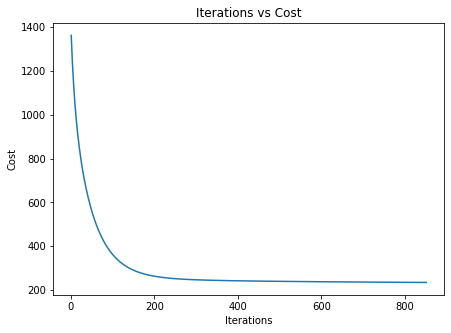

In [21]:
print(f"X_train:{X_train.shape}\ny_train:{Y_train.shape}")

seq_regressor = Regressor(normalize = True)
seq_regressor.seq_fit(X_train,Y_train)

train_score = r2_score(seq_regressor.predict(X_train),Y_train)
test_score = r2_score(seq_regressor.predict(X_test),Y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

## LASSO

In [11]:
from sklearn.linear_model import Lasso
alpha = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
lasso = []
L = []
for i in alpha:
    lasso.append(Lasso(i))
for j in range(len(lasso)):
    L.append(lasso[j].fit(X_train, Y_train))

In [12]:
for j in range(len(lasso)):
    print('alpha = ',  alpha[j])
    print('Number of Coefficients used: ', (L[j].coef_ != 0).sum())
    print('R squared training set', round(L[j].score(X_train, Y_train)*100, 2))
    print('R squared test set', round(L[j].score(X_test, Y_test)*100, 2))
    print('Accuracy ', r2_score(L[j].predict(X_test), Y_test))

alpha =  0.9
Number of Coefficients used:  16
R squared training set 62.16
R squared test set 52.12
Accuracy  0.2592864572519009
alpha =  0.85
Number of Coefficients used:  16
R squared training set 62.24
R squared test set 52.13
Accuracy  0.2623512088745874
alpha =  0.8
Number of Coefficients used:  17
R squared training set 62.47
R squared test set 52.45
Accuracy  0.2717418121485117
alpha =  0.75
Number of Coefficients used:  17
R squared training set 62.7
R squared test set 52.76
Accuracy  0.2815525365990489
alpha =  0.7
Number of Coefficients used:  17
R squared training set 62.92
R squared test set 53.01
Accuracy  0.29097179572223597
alpha =  0.65
Number of Coefficients used:  17
R squared training set 63.12
R squared test set 53.2
Accuracy  0.29998512149513534
alpha =  0.6
Number of Coefficients used:  17
R squared training set 63.31
R squared test set 53.34
Accuracy  0.3085799983712664
alpha =  0.55
Number of Coefficients used:  17
R squared training set 63.48
R squared test set

In [13]:
beta_lasso = []
for i in range(len(L)):
    beta_lasso.append(L[i].coef_ )

##Coefficients of Lasso
Lasso_coef = pd.DataFrame(beta_lasso); Lasso_coef


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.713281,0.036112,-0.091492,0.291055,0.013861,0.0,0.024680,-0.051895,-0.002373,-0.231233,0.220618,0.189576,-0.443799,0.545287,-0.516548,0.000000,-0.065162,0.000000,-6.971881
1,1.817528,0.034030,-0.088557,0.291254,0.013510,0.0,0.024450,-0.053406,-0.002348,-0.230037,0.222005,0.191122,-0.448235,0.544944,-0.516237,0.000000,-0.067554,0.000000,-7.458012
2,1.733729,0.033523,-0.086494,0.292769,0.014135,0.0,0.024409,-0.053387,-0.002362,-0.227070,0.220878,0.191778,-0.457304,0.550227,-0.521898,1.227828,-0.070013,0.000000,-8.035881
3,1.627072,0.033208,-0.084538,0.294444,0.014877,0.0,0.024390,-0.053183,-0.002381,-0.223887,0.219445,0.192326,-0.466934,0.556195,-0.528287,2.604583,-0.072481,0.000000,-8.624808
4,1.520445,0.032893,-0.082581,0.296118,0.015620,0.0,0.024371,-0.052978,-0.002399,-0.220705,0.218013,0.192875,-0.476565,0.562159,-0.534670,3.981244,-0.074946,0.000000,-9.213740
5,1.413822,0.032578,-0.080624,0.297791,0.016363,0.0,0.024352,-0.052774,-0.002417,-0.217523,0.216581,0.193424,-0.486196,0.568121,-0.541053,5.357890,-0.077410,0.000000,-9.802673
6,1.307202,0.032263,-0.078667,0.299465,0.017106,0.0,0.024333,-0.052569,-0.002436,-0.214340,0.215149,0.193974,-0.495828,0.574083,-0.547436,6.734526,-0.079874,0.000000,-10.391606
7,1.200592,0.031947,-0.076710,0.301138,0.017848,0.0,0.024314,-0.052365,-0.002454,-0.211158,0.213718,0.194523,-0.505459,0.580044,-0.553817,8.111130,-0.082337,0.000000,-10.980541
8,1.105388,0.031708,-0.075980,0.304983,0.019325,0.0,0.023699,-0.054341,-0.002488,-0.209582,0.211957,0.189878,-0.510292,0.585384,-0.558835,9.465002,-0.083825,0.228675,-11.653420


Text(0.5, 1.0, 'Penalty = 0.5')

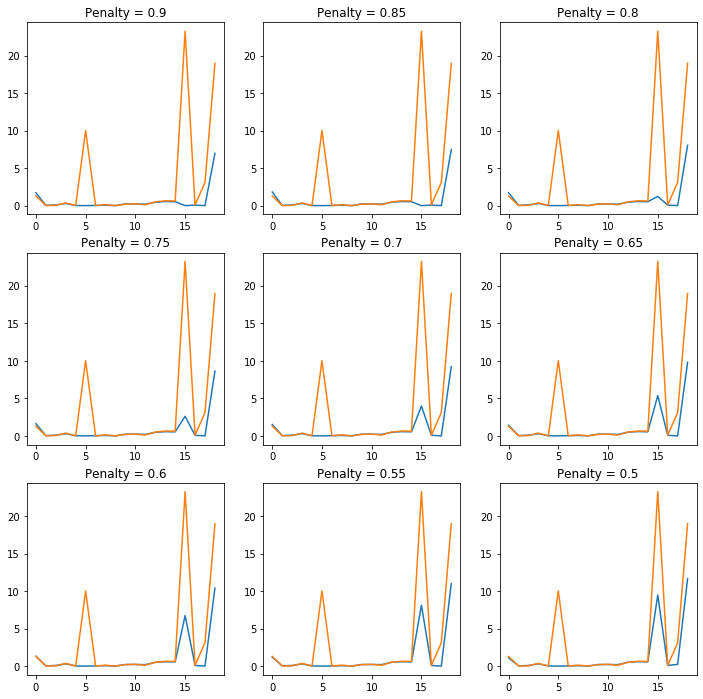

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

ax[0, 0].plot(abs(beta_lasso[0])) 
ax[0, 0].plot(abs(beta_ols))
ax[0, 0].set_title('Penalty = 0.9')

ax[0, 1].plot(abs(beta_lasso[1])) 
ax[0, 1].plot(abs(beta_ols))
ax[0, 1].set_title('Penalty = 0.85')

ax[0, 2].plot(abs(beta_lasso[2])) 
ax[0, 2].plot(abs(beta_ols))
ax[0, 2].set_title('Penalty = 0.8')

ax[1, 0].plot(abs(beta_lasso[3])) 
ax[1, 0].plot(abs(beta_ols))
ax[1, 0].set_title('Penalty = 0.75')

ax[1, 1].plot(abs(beta_lasso[4])) 
ax[1, 1].plot(abs(beta_ols))
ax[1, 1].set_title('Penalty = 0.7')

ax[1, 2].plot(abs(beta_lasso[5])) 
ax[1, 2].plot(abs(beta_ols))
ax[1, 2].set_title('Penalty = 0.65')

ax[2, 0].plot(abs(beta_lasso[6])) 
ax[2, 0].plot(abs(beta_ols))
ax[2, 0].set_title('Penalty = 0.6')

ax[2, 1].plot(abs(beta_lasso[7])) 
ax[2, 1].plot(abs(beta_ols))
ax[2, 1].set_title('Penalty = 0.55')

ax[2, 2].plot(abs(beta_lasso[8])) 
ax[2, 2].plot(abs(beta_ols))
ax[2, 2].set_title('Penalty = 0.5')

Computing regularization path using the LASSO ...


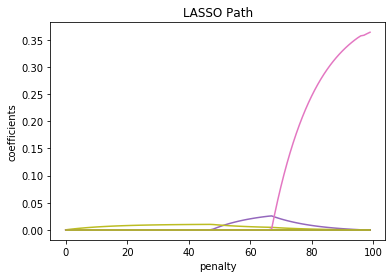

In [15]:
## Lasso Path
from sklearn import linear_model

X_l, Y_l = X_train, Y_train

print("Computing regularization path using the LASSO ...")


a,coefs, b = linear_model.lasso_path(np.array(X_l), np.array(Y_l))

plt.plot( coefs.T)
ymin, ymax = plt.ylim() 
plt.xlabel("penalty")
plt.ylabel("coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()


Computing regularization path using the LASSO ...


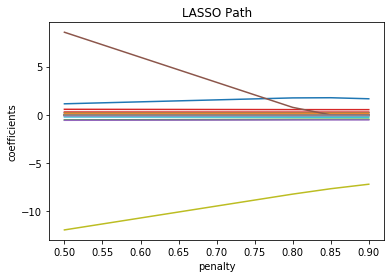

In [16]:
## Lasso Path for our desired penalty values
from sklearn import linear_model

X_l, Y_l = X_train, Y_train

print("Computing regularization path using the LASSO ...")


a,coefs, b = linear_model.lasso_path(np.array(X_l), np.array(Y_l), n_alphas = 9, alphas = alpha)


plt.plot(alpha, coefs.T)
ymin, ymax = plt.ylim() 
plt.xlabel("penalty")
plt.ylabel("coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

## RIDGE

In [17]:
from sklearn.linear_model import Ridge

alpha = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
ridge = []
R = []
for i in alpha:
    ridge.append(Ridge(i))
for j in range(len(ridge)):
    R.append(ridge[j].fit(X_train, Y_train))

In [18]:
for j in range(len(ridge)):
    print('alpha = ',  alpha[j])
    print('R squared training set', round(R[j].score(X_train, Y_train)*100, 2))
    print('R squared test set', round(R[j].score(X_test, Y_test)*100, 2))
    print('Accuracy ', r2_score(R[j].predict(X_test), Y_test))

alpha =  0.9
R squared training set 64.64
R squared test set 51.13
Accuracy  0.3935326951660115
alpha =  0.85
R squared training set 64.64
R squared test set 51.13
Accuracy  0.3935426144205467
alpha =  0.8
R squared training set 64.64
R squared test set 51.13
Accuracy  0.39355253668969314
alpha =  0.75
R squared training set 64.64
R squared test set 51.12
Accuracy  0.39356246197508093
alpha =  0.7
R squared training set 64.64
R squared test set 51.12
Accuracy  0.3935723902783427
alpha =  0.65
R squared training set 64.64
R squared test set 51.12
Accuracy  0.39358232160111073
alpha =  0.6
R squared training set 64.64
R squared test set 51.12
Accuracy  0.39359225594501857
alpha =  0.55
R squared training set 64.64
R squared test set 51.12
Accuracy  0.3936021933116991
alpha =  0.5
R squared training set 64.64
R squared test set 51.12
Accuracy  0.39361213370278625


In [19]:
beta_ridge = []
for i in range(len(R)):
    beta_ridge.append(R[i].coef_ )

##Coefficients of Ridge
Ridge_coef = pd.DataFrame(beta_ridge); Ridge_coef

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.005144,0.028266,-0.074818,0.372129,0.038822,-7.899910,0.008583,-0.082279,-0.002910,-0.205117,0.209917,0.106144,-0.490767,0.650113,-0.618779,24.661254,-0.088175,3.852845,-18.567563
1,1.005251,0.028266,-0.074817,0.372143,0.038824,-7.903995,0.008580,-0.082277,-0.002910,-0.205114,0.209923,0.106134,-0.490751,0.650130,-0.618797,24.664427,-0.088174,3.853013,-18.568139
2,1.005358,0.028265,-0.074816,0.372156,0.038827,-7.908082,0.008577,-0.082275,-0.002910,-0.205112,0.209929,0.106124,-0.490736,0.650147,-0.618816,24.667602,-0.088172,3.853181,-18.568716
3,1.005466,0.028265,-0.074815,0.372170,0.038829,-7.912173,0.008574,-0.082273,-0.002910,-0.205110,0.209935,0.106114,-0.490720,0.650164,-0.618835,24.670778,-0.088170,3.853349,-18.569293
4,1.005574,0.028265,-0.074814,0.372184,0.038831,-7.916266,0.008571,-0.082271,-0.002910,-0.205108,0.209941,0.106105,-0.490705,0.650181,-0.618854,24.673955,-0.088169,3.853517,-18.569870
5,1.005682,0.028265,-0.074813,0.372197,0.038833,-7.920363,0.008567,-0.082268,-0.002910,-0.205106,0.209947,0.106095,-0.490689,0.650199,-0.618872,24.677134,-0.088167,3.853685,-18.570446
6,1.005790,0.028265,-0.074812,0.372211,0.038835,-7.924462,0.008564,-0.082266,-0.002910,-0.205104,0.209953,0.106085,-0.490674,0.650216,-0.618891,24.680313,-0.088165,3.853853,-18.571023
7,1.005898,0.028265,-0.074811,0.372224,0.038837,-7.928565,0.008561,-0.082264,-0.002911,-0.205102,0.209959,0.106075,-0.490658,0.650233,-0.618910,24.683494,-0.088164,3.854021,-18.571600
8,1.006007,0.028265,-0.074810,0.372238,0.038839,-7.932670,0.008558,-0.082262,-0.002911,-0.205099,0.209965,0.106065,-0.490642,0.650250,-0.618929,24.686677,-0.088162,3.854189,-18.572176


Text(0.5, 1.0, 'Penalty = 0.5')

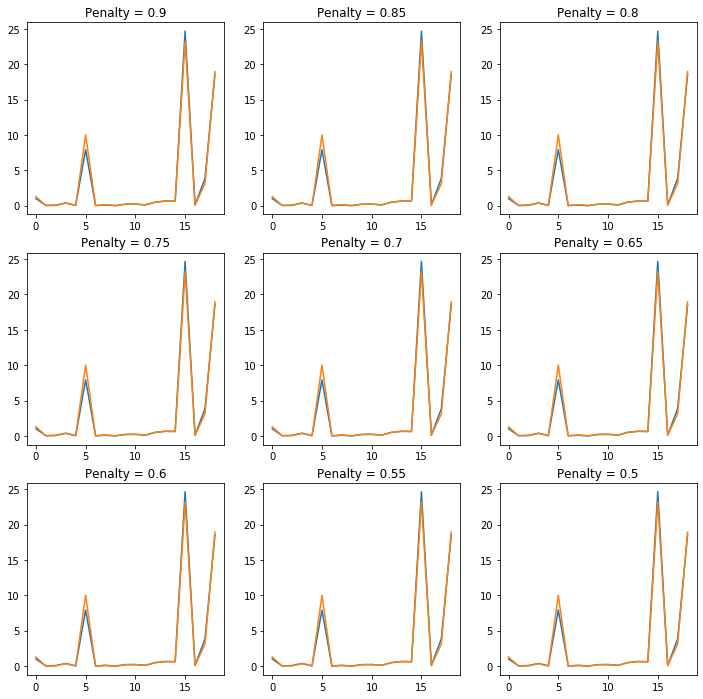

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

ax[0, 0].plot(abs(beta_ridge[0])) 
ax[0, 0].plot(abs(beta_ols))
ax[0, 0].set_title('Penalty = 0.9')

ax[0, 1].plot(abs(beta_ridge[1])) 
ax[0, 1].plot(abs(beta_ols))
ax[0, 1].set_title('Penalty = 0.85')

ax[0, 2].plot(abs(beta_ridge[2])) 
ax[0, 2].plot(abs(beta_ols))
ax[0, 2].set_title('Penalty = 0.8')

ax[1, 0].plot(abs(beta_ridge[3])) 
ax[1, 0].plot(abs(beta_ols))
ax[1, 0].set_title('Penalty = 0.75')

ax[1, 1].plot(abs(beta_ridge[4])) 
ax[1, 1].plot(abs(beta_ols))
ax[1, 1].set_title('Penalty = 0.7')

ax[1, 2].plot(abs(beta_ridge[5])) 
ax[1, 2].plot(abs(beta_ols))
ax[1, 2].set_title('Penalty = 0.65')

ax[2, 0].plot(abs(beta_ridge[6])) 
ax[2, 0].plot(abs(beta_ols))
ax[2, 0].set_title('Penalty = 0.6')

ax[2, 1].plot(abs(beta_ridge[7])) 
ax[2, 1].plot(abs(beta_ols))
ax[2, 1].set_title('Penalty = 0.55')

ax[2, 2].plot(abs(beta_ridge[8])) 
ax[2, 2].plot(abs(beta_ols))
ax[2, 2].set_title('Penalty = 0.5')

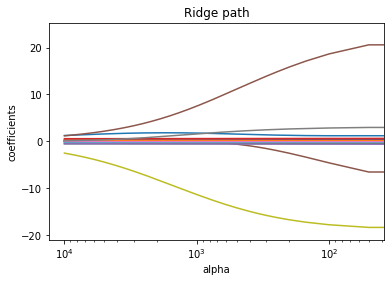

In [21]:
##Ridge path

X_r, Y_r = X_train, Y_train

n_alphas = 200
alphas = np.linspace(0, 10000, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_r, Y_r)
    coefs.append(ridge.coef_)
    
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge path")
plt.axis("tight")
plt.show()

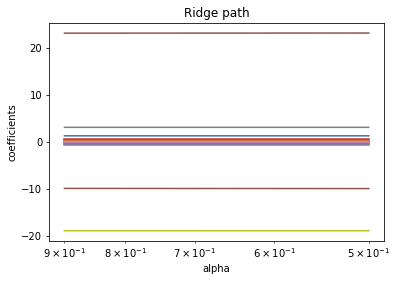

In [69]:
X_r, Y_r = X_train, Y_train

n_alphas = 9
alphas = alpha

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_r, Y_r)
    coefs.append(ridge.coef_)
    
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge path")
plt.axis("tight")
plt.show()

In [32]:
R_df = Ridge_coef.T
R_df.columns = ['alpha = 0.90',  'alpha = 0.85',  'alpha = 0.80', 'alpha = 0.75', 
               'alpha = 0.70',  'alpha = 0.65', 'alpha = 0.60',  'alpha = 0.55',  'alpha = 0.50']; R_df

,alpha = 0.90,alpha = 0.85,alpha = 0.80,alpha = 0.75,alpha = 0.70,alpha = 0.65,alpha = 0.60,alpha = 0.55,alpha = 0.50
0,1.005144,1.005251,1.005358,1.005466,1.005574,1.005682,1.005790,1.005898,1.006007
1,0.028266,0.028266,0.028265,0.028265,0.028265,0.028265,0.028265,0.028265,0.028265
2,-0.074818,-0.074817,-0.074816,-0.074815,-0.074814,-0.074813,-0.074812,-0.074811,-0.074810
3,0.372129,0.372143,0.372156,0.372170,0.372184,0.372197,0.372211,0.372224,0.372238
4,0.038822,0.038824,0.038827,0.038829,0.038831,0.038833,0.038835,0.038837,0.038839
5,-7.899910,-7.903995,-7.908082,-7.912173,-7.916266,-7.920363,-7.924462,-7.928565,-7.932670
6,0.008583,0.008580,0.008577,0.008574,0.008571,0.008567,0.008564,0.008561,0.008558
7,-0.082279,-0.082277,-0.082275,-0.082273,-0.082271,-0.082268,-0.082266,-0.082264,-0.082262
8,-0.002910,-0.002910,-0.002910,-0.002910,-0.002910,-0.002910,-0.002910,-0.002911,-0.002911
9,-0.205117,-0.205114,-0.205112,-0.205110,-0.205108,-0.205106,-0.205104,-0.205102,-0.205099


In [33]:
L_df = Lasso_coef.T
L_df.columns = ['alpha = 0.90',  'alpha = 0.85',  'alpha = 0.80', 'alpha = 0.75', 
               'alpha = 0.70',  'alpha = 0.65', 'alpha = 0.60',  'alpha = 0.55',  'alpha = 0.50']; L_df

,alpha = 0.90,alpha = 0.85,alpha = 0.80,alpha = 0.75,alpha = 0.70,alpha = 0.65,alpha = 0.60,alpha = 0.55,alpha = 0.50
0,1.713281,1.817528,1.733729,1.627072,1.520445,1.413822,1.307202,1.200592,1.105388
1,0.036112,0.034030,0.033523,0.033208,0.032893,0.032578,0.032263,0.031947,0.031708
2,-0.091492,-0.088557,-0.086494,-0.084538,-0.082581,-0.080624,-0.078667,-0.076710,-0.075980
3,0.291055,0.291254,0.292769,0.294444,0.296118,0.297791,0.299465,0.301138,0.304983
4,0.013861,0.013510,0.014135,0.014877,0.015620,0.016363,0.017106,0.017848,0.019325
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.024680,0.024450,0.024409,0.024390,0.024371,0.024352,0.024333,0.024314,0.023699
7,-0.051895,-0.053406,-0.053387,-0.053183,-0.052978,-0.052774,-0.052569,-0.052365,-0.054341
8,-0.002373,-0.002348,-0.002362,-0.002381,-0.002399,-0.002417,-0.002436,-0.002454,-0.002488
9,-0.231233,-0.230037,-0.227070,-0.223887,-0.220705,-0.217523,-0.214340,-0.211158,-0.209582
